# Detección de anomalías: Dataset sintético

## ¿Qué vamos a hacer?
- Crear un dataset sintético para detección de anomalías con casos normales y anómalos.
- Modelizar una distribución gaussiana sobre los datos normales.
- Determinar el umbral de probabilidad para detectar los datos anómalos por validación.
- Evaluar la precisión final del modelo sobre el subconjunto de test.
- Representar gráficamente el comportamiento del modelo en cada paso.

In [49]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.colors import from_levels_and_colors

plot_n = 1
rng = np.random.RandomState(42)

## Crear un dataset sintético para detección de anomalías

- Crear un dataset 2D (para visualización) de datos normales, con blobs?
- Añadir datos anómalos
- Dividir en training, validation y test
- preprocesarlos, desordenar por separado
- Representar en 2D la ground truth

Para resolver este ejercicio, primero necesitamos crear un dataset con datos normales y otro con datos anómalos. En este caso, los datasets serán de 2 dimensiones (2D) con 2 características únicamente, en lugar de un nº de características *n* elevado, para facilitar su visualización en una representación 2D.

Inicialmente, vamos a crear 2 datasets independientes, uno que representará los datos normales y otro los datos anómalos. Luego combinaremos dichos datasets en 3 subsets finales, de entrenamiento, validación y test, como habitualmente, con la particularidad de que en este caso los datos anómalos sólo se encontrarán en los subsets de validación y test.

Completa la siguiente celda de código para crear los datasets iniciales independientes con datos normales y anómalos:

Nº de ejemplos: 300, ratio de ejemplos anómalos: 15.0%, nº de datos normales y anómalos: 255/45
Nº de características: 2


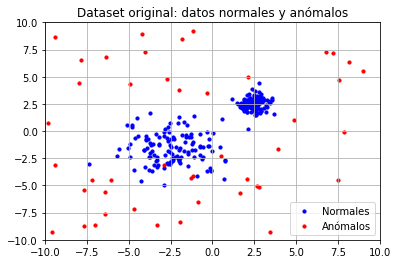

In [35]:
# TODO: Genera dos datasets sintéticos independientes con datos normales y anómalos

m = 300
n = 2
ratio_anomalos = 0.15    # Porcentaje de datos anómalos vs datos normales, modificable
m_anomalos = int(m * ratio_anomalos)
m_normales = m - m_anomalos
x_lim = (-10, 10)
y_lim = (-10, 10)

print('Nº de ejemplos: {}, ratio de ejemplos anómalos: {}%, nº de datos normales y anómalos: {}/{}'.format(m, ratio_anomalos * 100, m_normales, m_anomalos))
print('Nº de características: {}'.format(n))

# Creamos ambos datasets
dataset_normales = make_blobs(n_samples=m_normales, n_features=n, centers=[[2.5, 2.5], [-2.5, -1.5]], cluster_std=[0.5, 1.5], random_state=42)
dataset_normales = dataset_normales[0]    # Descartamos el resto de información y retenemos sólo las posiciones de los ejemplos
dataset_anomalos = np.random.uniform(low=(x_lim[0], y_lim[0]), high=(x_lim[1], y_lim[1]), size=(m_anomalos, 2))

# Representamos los datos iniciales
plt.figure(plot_n)

plt.title('Dataset original: datos normales y anómalos')

plt.scatter(dataset_normales[:, 0], dataset_normales[:, 1], s=10, color='b')
plt.scatter(dataset_anomalos[:, 0], dataset_anomalos[:, 1], s=10, color='r')

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.legend(('Normales', 'Anómalos'))
plt.grid()

plt.show()

plot_n += 1

Antes de continuar, vamos a preprocesar los datos normalizándolos, como hacemos habitualmente. Dada que nuestra *X* se compondrá de ambos datasets, los normalizaremos al a vez.

En este caso, no insertamos una primera columna de 1s al dataset, por lo que normalizamos todas las columnas.

Completa la siguiente celda de código para normalizar los datos. Para ello, rescata tu función de normalización de ejercicios anteriores:

In [21]:
# TODO: Normaliza los datos de ambos datasets con los mismos parámetros de normalización

def normalize(x, mu, std):
    """ Normaliza un dataset con ejemplos X
    
    Argumentos posicionales:
    x -- array 2D de Numpy con los ejemplos, sin término de bias
    mu -- vector 1D de Numpy con la media de cada característica/columna
    std -- vector 1D de Numpy con la desviación típica de cada característica/columna
    
    Devuelve:
    x_norm -- array 2D de Numpy con los ejemplos, con sus características normalizadas
    """
    return [...]

# Halla la media y la desviación típica de las características de los datasets originales
# Concatena antes ambos datasets en una X común, asegurándote de utilizar el eje correcto
X = [...]
mu = [...]
std = [...]

print('Datasets originales:')
print(dataset_normales.shape, dataset_anomalos.shape)

print('Media y desviación típica de las características:')
print(mu)
print(mu.shape)
print(std)
print(std.shape)

print('Datasets normalizados:')
dataset_normales_norm = normalize(dataset_normales, mu, std)
dataset_anomalos_norm = normalize(dataset_anomalos, mu, std)

print(dataset_normales_norm.shape)
print(dataset_anomalos_norm.shape)

Datasets originales:
(255, 2) (45, 2)
Media y desviación típica de las características:
[Ellipsis]


AttributeError: 'list' object has no attribute 'shape'

Ahora vamos a subdividir los datasets originales en los subsets de entrenamiento, validación y test.

Para ello, dividimos el dataset de datos normales según los ratios habituales, y asignamos la mitad de datos anómalos a los subsets de validación y test. Si tuviéramos un nº de datos anómalos demasiado pequeño, podríamos incorporar una validación cruzada por K-fold.

Completa la siguiente celda de código para crear dichos subsets:

In [ ]:
# TODO: Divide los datasets en los subsets de entrenamiento, validación y test con los datos normales y anómalos divididos entre los 2 últimos

ratios = [66,33,33]
print('Ratios:\n', ratios, ratios[0] + ratios[1] + ratios[2])

r = [0,0]
# Consejo: la función round() y el atributo x.shape pueden serte útiles
r[0] = [...]
r[1] = [...]
print('Índices de corte:\n', r)

# Divide el dataset de datos normales en los 3 subsets siguiendo los ratios indicados
# Consejo: la función np.array_split() puede serte útil
X_train, X_cv, X_test = [...]

# Asigna la etiqueta de Y = 0 a todos los datos provenientes del dataset de datos normales, ya que denotaremos los datos anómalos como Y = 1
# Para ello, crea arrays 1D con la longitud del nº de ejemplos de cada subset con el valor de 0. (float) en cada elemento
Y_train = [...]
Y_cv = [...]
Y_test = [...]

# Ahora concatena la mitad de los datos anómalos al subset de validación y la otra mitad al subset de test
# Consejo: de nuevo, la función np.array_split() puede serte útil
dataset_anomalos_cv, dataset_anomalos_test = [...]

X_cv = [...]
X_test = [...]
# El resultado final para X_cv y X_test serán vectores 2D de (m_normales * ratio[CV o test] + m_anomalos / 2, n)

# Por último, al igual que hemos hecho antes, concatena a Y_cv e Y_test sendos arrays 1D con la longitud del nº de ejemplos anómalos en cada subset (la mitad de m_anomalos)
# Cada array, en esta ocasión, tiene valores de 1. (float) en cada elemento
Y_cv = [...]
Y_test = [...]
# El resultado final para Y_cv y Y_test serán vectores 1D de (m_normales * ratio[CV o test], 1) de 0s y (m_anomalos / 2, 1) de 1s.

# Comprobamos los subsets creados
print('Tamaños de los subsets de entrenamiento, validación y test:')
print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)
print(X_test.shape)
print(Y_test.shape)

Por último, vamos a acabar de preprocesar los datasets, reordenándolos aleatoriamente.

Completa la siguiente celda de código para reordenar aleatoriamente los subsets:

In [ ]:
# TODO: Reordena aleatoriamente los subsets de entrenamiento, validación y test individualmente

print('Primeras 10 filas y 2 columnas de X y vector Y:')
print('Subset de entrenamiento:')
print()
print()
print('Subset de validación:')
print()
print()
print('Subset de test:')
print()
print()

print('Reordenamos X e Y:')
# Si lo prefieres, puedes usar la función de conveniencia de sklearn.utils.shuffle
# Usa un estado aleatorio inicial de 42, para mantener la reproducibilidad
X_train, Y_train = [...]
X_cv, Y_cv = [...]
X_test, Y_test = [...]

print('Primeras 10 filas y 2 columnas de X y vector Y:')
print('Subset de entrenamiento:')
print()
print()
print('Subset de validación:')
print()
print()
print('Subset de test:')
print()
print()

print('Tamaños de los subsets de entrenamiento, validación y test:')
print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)
print(X_test.shape)
print(Y_test.shape)

Por último, representamos nuestros 3 subsets en una gráfica 2D.

Completa la siguiente celda de código para representar los subsets:

In [59]:
X_train = dataset_normales[:200, :]
Y_train = np.ones(X_train.shape[0])
X_cv = dataset_normales[200:230, :]
Y_cv = np.zeros(X_cv.shape[0])
X_test = dataset_normales[230:, :]
Y_test = np.zeros(X_test.shape[0])

print(dataset_normales.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)
print(X_test.shape)
print(Y_test.shape)

(255, 2)
(200, 2)
(200,)
(30, 2)
(30,)
(25, 2)
(25,)


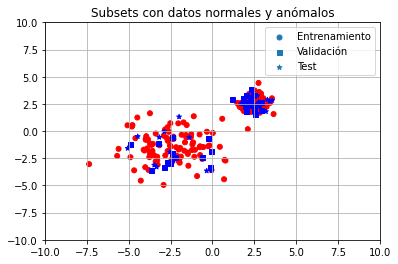

In [69]:
# Representamos los datos iniciales
plt.figure(plot_n)

plt.title('Subsets con datos normales y anómalos')

cmap, norm = from_levels_and_colors([0., 0.5, 1.1], ['blue', 'red'])

plt.scatter(X_train[:, 0], X_train[:, 1], s=25, c=Y_train, marker='o', cmap=cmap, norm=norm)
plt.scatter(X_cv[:, 0], X_cv[:, 1], s=25, c=Y_cv, marker='s', cmap=cmap, norm=norm)
plt.scatter(X_test[:, 0], X_test[:, 1], s=25, c=Y_test, marker='*', cmap=cmap, norm=norm)

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.legend(('Entrenamiento', 'Validación', 'Test'))
plt.grid()

plt.show()

plot_n += 1

## Modelizar una distribución gaussiana

- Modelizar la distribución gaussiana, obtener $\mu$ y $\Sigma$
- Representar gráficamente los niveles de probabilidad con cortes 2D sobre subset de training

In [ ]:
# TODO

## Determinar el umbral de probabilidad para detectar casos anómalos

- Representar gráficamente los datos normales y anómalos junto a los cortes de probabilidad sobre el subset de validación
- Hayar la probabilidad de cada caso anómalo y representarla gráficamente
- Evaluar un espacio lineal de valores de E como la probabilidad con mejor métrica de clasificación por validación, sobre el subset de validación

In [ ]:
# TODO

## Evaluar la precisión final del modelo

- Representar gráficamente los datos normales y anómalos sobre el subset de test, junto a los cortes de probabilidad
- Evaluar el modelo sobre el subset de test
- Representar de nuevo resaltando los ejemplos sobre los que se equivoca
- Representar gráficamente de nuevo todos los datos, sobre los 3 subsets, junto a los cortes de probabilidad

In [ ]:
# TODO